# 설립일자는 가격에 영향을 주는가? 

In [3]:
train = read.csv('train.csv')
park = read.csv('park.csv')
submission = read.csv('submission.csv')
d = read.csv('day_care_center.csv')
test = read.csv('test.csv')



In [4]:
head(train)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<int>
1,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
2,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
3,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
4,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
5,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000
6,5,12536,서울특별시,인의동,48-2,효성쥬얼리시티,인의동 48-2 효성쥬얼리시티,106.81,2006,200801,1~10,16,67000


In [5]:
str(train)

'data.frame':	1216553 obs. of  13 variables:
 $ transaction_id        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ apartment_id          : int  7622 5399 3578 10957 10639 12536 12536 12536 12536 12536 ...
 $ city                  : chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ dong                  : chr  "신교동" "필운동" "필운동" "내수동" ...
 $ jibun                 : chr  "6-13" "142" "174-1" "95" ...
 $ apt                   : chr  "신현(101동)" "사직파크맨션" "두레엘리시안" "파크팰리스" ...
 $ addr_kr               : chr  "신교동 6-13 신현(101동)" "필운동 142 사직파크맨션" "필운동 174-1 두레엘리시안" "내수동 95 파크팰리스" ...
 $ exclusive_use_area    : num  84.8 99.2 84.7 146.4 194.4 ...
 $ year_of_completion    : int  2002 1973 2007 2003 2004 2006 2006 2006 2006 2006 ...
 $ transaction_year_month: int  200801 200801 200801 200801 200801 200801 200801 200801 200801 200801 ...
 $ transaction_date      : chr  "21~31" "1~10" "1~10" "11~20" ...
 $ floor                 : int  2 6 6 15 3 16 7 7 15 7 ...
 $ transaction_real_price: int  37500 20000 38500 118000

In [6]:
summary(train$year_of_completion)

# 필요한 자료
df = train[,c(9,13)]
s_df = train[train$city=='서울특별시',]
s_df = s_df[,c(9,13)]
b_df = train[train$city=='부산광역시',]
b_df = b_df[,c(9,13)]


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1961    1993    1999    1998    2005    2017 

In [7]:
b_df

,year_of_completion,transaction_real_price
,<int>,<int>
650922,1998,7900
650923,2005,13000
650924,1997,12400
650925,1998,10600
650926,1997,10000
650927,2006,9000
650928,1980,5700
650929,1969,1100
650930,1975,5200


In [8]:
# 결측 구하기.
sum(is.na(s_df$year_of_completion))
sum(is.na(b_df$year_of_completion))


[1] 0

[1] 0

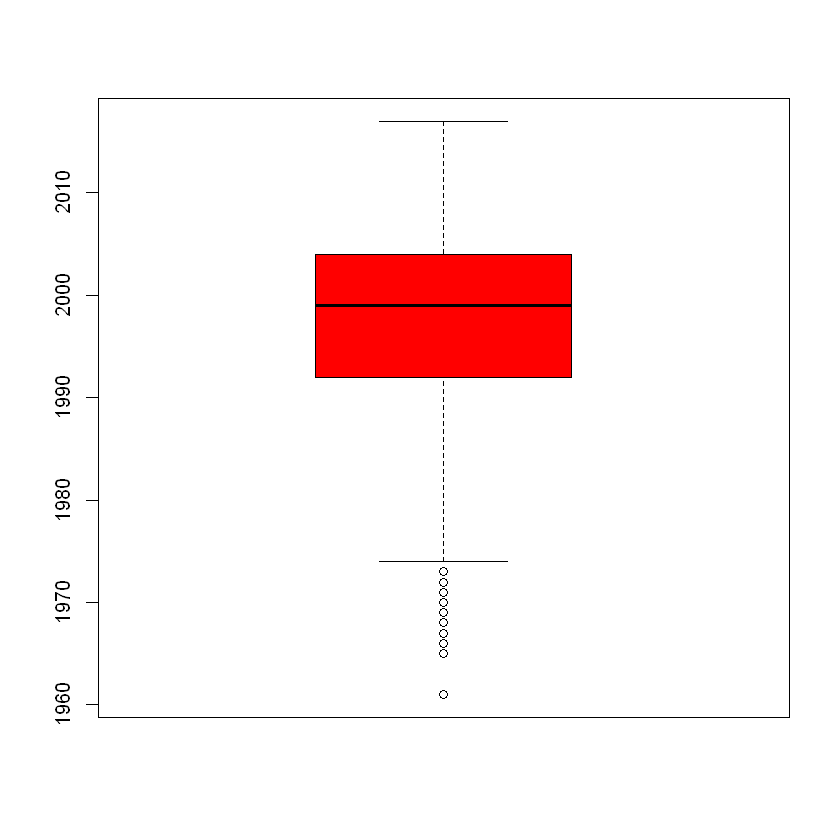

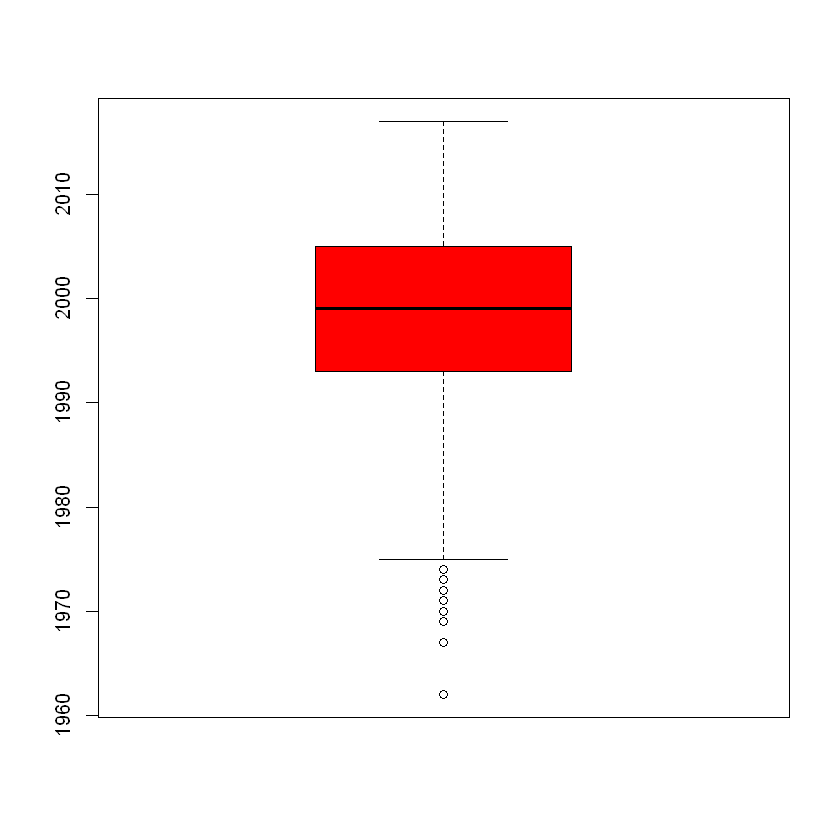

In [9]:
# 이상치 확인
boxplot(s_df$year_of_completion, col = 'red')
boxplot(b_df$year_of_completion, col = 'red')

In [10]:
# 이상치
boxplot.stats(df$year_of_completion)
# 이상치 

$stats
[1] 1975 1993 1999 2005 2017

$n
[1] 1216553

$conf
[1] 1998.983 1999.017

$out
   [1] 1973 1968 1968 1968 1968 1968 1968 1968 1971 1971 1968 1968 1971 1970
  [15] 1971 1971 1968 1968 1968 1971 1968 1966 1966 1966 1966 1966 1966 1971
  [29] 1971 1966 1971 1966 1966 1971 1966 1971 1966 1966 1973 1966 1968 1973
  [43] 1968 1970 1968 1970 1968 1971 1973 1971 1970 1968 1968 1970 1968 1968
  [57] 1968 1968 1968 1968 1970 1971 1973 1973 1973 1971 1968 1968 1973 1968
  [71] 1968 1971 1971 1971 1971 1971 1971 1971 1968 1968 1973 1968 1968 1968
  [85] 1968 1968 1973 1968 1968 1968 1968 1968 1968 1966 1973 1966 1966 1966
  [99] 1971 1966 1966 1966 1966 1966 1966 1966 1973 1966 1966 1966 1973 1971
 [113] 1966 1973 1971 1971 1971 1971 1966 1971 1966 1973 1971 1971 1966 1966
 [127] 1973 1970 1973 1968 1973 1973 1971 1971 1971 1968 1971 1970 1968 1968
 [141] 1968 1971 1968 1968 1968 1968 1971 1971 1971 1968 1971 1971 1968 1973
 [155] 1968 1971 1966 1968 1968 1966 1971 1971 1972 1968 1972 1972 1970 1971
 [169] 1971 1968 1968 1971 1972 1968 1971 1971 1968 1972 1970 1968 1968 1968
 [183] 1970 1970 1968 1968 1968 1965 1965 1968 1965 1970 1968 1968 1970 1970
 [197] 1971 1968 1968 1972 1965 1972 1968 1968 1968 1968 1968 1965 1968 1968
 [211] 1969 1968 1970 1965 1970 1970 1970 1968 1970 1968 1970 1970 1970 1970
 [225] 1968 1970 1968 1968 1970 1970 1968 1965 1971 1968 1971 1971 1968 1965
 [239] 1970 1965 1968 1970 1972 1965 1970 1968 1968 1970 1968 1971 1968 1972
 [253] 1972 1968 1968 1970 1972 1972 1968 1970 1970 1970 1972 1970 1970 1968
 [267] 1970 1970 1968 1970 1970 1968 1965 1968 1968 1971 1970 1970 1968 1971
 [281] 1970 1970 1970 1970 1968 1970 1968 1965 1971 1970 1968 1971 1970 1970
 [295] 1970 1970 1970 1970 1970 1971 1970 1971 1965 1970 1968 1971 1968 1970
 [309] 1970 1968 1972 1970 1970 1968 1971 1971 1970 1968 1968 1968 1968 1971
 [323] 1970 1970 1968 1970 1970 1968 1968 1970 1970 1971 1970 1968 1972 1974
 [337] 1971 1974 1971 1971 1974 1974 1974 1969 1969 1974 1973 1969 1974 1974
 [351] 1974 1970 1974 1970 1971 1972 1971 1971 1972 1971 1974 1971 1974 1974
 [365] 1974 1974 1969 1969 1969 1970 1970 1971 1969 1971 1971 1970 1974 1971
 [379] 1974 1974 1974 1971 1972 1974 1974 1971 1972 1973 1974 1970 1971 1974
 [393] 1970 1974 1971 1974 1970 1969 1974 1974 1974 1974 1974 1974 1973 1974
 [407] 1974 1970 1973 1974 1971 1974 1970 1969 1969 1971 1974 1970 1970 1971
 [421] 1974 1974 1970 1971 1971 1973 1970 1974 1974 1974 1974 1971 1971 1974
 [435] 1974 1973 1969 1974 1974 1971 1974 1974 1970 1970 1974 1971 1971 1974
 [449] 1973 1969 1974 1973 1971 1969 1970 1970 1971 1972 1974 1971 1974 1974
 [463] 1972 1971 1974 1972 1974 1974 1973 1974 1974 1974 1971 1974 1972 1971
 [477] 1971 1974 1972 1969 1969 1969 1974 1974 1970 1970 1970 1973 1973 1974
 [491] 1974 1974 1971 1974 1971 1974 1974 1971 1972 1974 1970 1974 1970 1974
 [505] 1974 1971 1974 1974 1971 1972 1971 1971 1971 1971 1971 1974 1974 1974
 [519] 1970 1970 1970 1974 1971 1971 1971 1974 1974 1974 1974 1971 1974 1972
 [533] 1971 1971 1974 1974 1974 1974 1974 1974 1972 1974 1971 1974 1970 1974
 [547] 1970 1970 1970 1974 1974 1970 1972 1972 1973 1969 1974 1971 1974 1971
 [561] 1971 1974 1971 1972 1974 1971 1974 1971 1974 1974 1971 1972 1970 1969
 [575] 1974 1974 1971 1970 1971 1974 1971 1974 1970 1973 1972 1974 1974 1973
 [589] 1971 1974 1974 1971 1974 1972 1969 1969 1974 1970 1974 1974 1974 1970
 [603] 1974 1971 1974 1974 1974 1974 1974 1971 1974 1971 1972 1974 1974 1974
 [617] 1969 1969 1974 1970 1970 1969 1971 1971 1974 1974 1974 1974 1971 1974
 [631] 1971 1971 1974 1970 1970 1970 1970 1974 1972 1971 1974 1971 1974 1974
 [645] 1971 1974 1974 1969 1974 1974 1974 1971 1971 1974 1974 1974 1971 1969
 [659] 1969 1972 1972 1970 1974 1972 1974 1972 1974 1971 1974 1973 1974 1971
 [673] 1974 1971 1970 1971 1971 1974 1970 1969 1971 1974 1974 1974 1974 1972
 [687] 1974 1971 1970 1972 1974 1974 1974 1971 1970 1970 1974 1971 1974 1974
 [701] 1974 1974 1971 1972 1974 1971 1971 1971 1971 1974 1971 1

In [11]:
df_1995 <- df[df$year_of_completion>=1995,];df_1995

aggregate(df_1995, by=list(df_1995$year_of_completion), FUN=mean)

,year_of_completion,transaction_real_price
,<int>,<int>
1,2002,37500
3,2007,38500
4,2003,118000
5,2004,120000
6,2006,67000
7,2006,50270
8,2006,46000
9,2006,35368
10,2006,46800


Group.1,year_of_completion,transaction_real_price
<int>,<dbl>,<dbl>
1995,1995,26526.34
1996,1996,24451.84
1997,1997,31785.44
1998,1998,30423.98
1999,1999,33117.35
2000,2000,37390.74
2001,2001,36065.37
2002,2002,36547.24
2003,2003,39978.69


In [12]:
mean_completion = mean(df_1995$year_of_completion);mean_completion
sd_completion = sd(df_1995$year_of_completion);sd_completion
mean_rp = mean(df_1995$transaction_real_price);mean_rp
sd_rp = sd(df_1995$transaction_real_price);sd_rp


[1] 2003.139

[1] 5.188316

[1] 38809.11

[1] 29541.92

In [13]:
mean_df = aggregate(df_1995, by=list(df_1995$year_of_completion), FUN=mean)
mean_df = mean_df[,c(2,3)];mean_df


year_of_completion,transaction_real_price
<dbl>,<dbl>
1995,26526.34
1996,24451.84
1997,31785.44
1998,30423.98
1999,33117.35
2000,37390.74
2001,36065.37
2002,36547.24
2003,39978.69


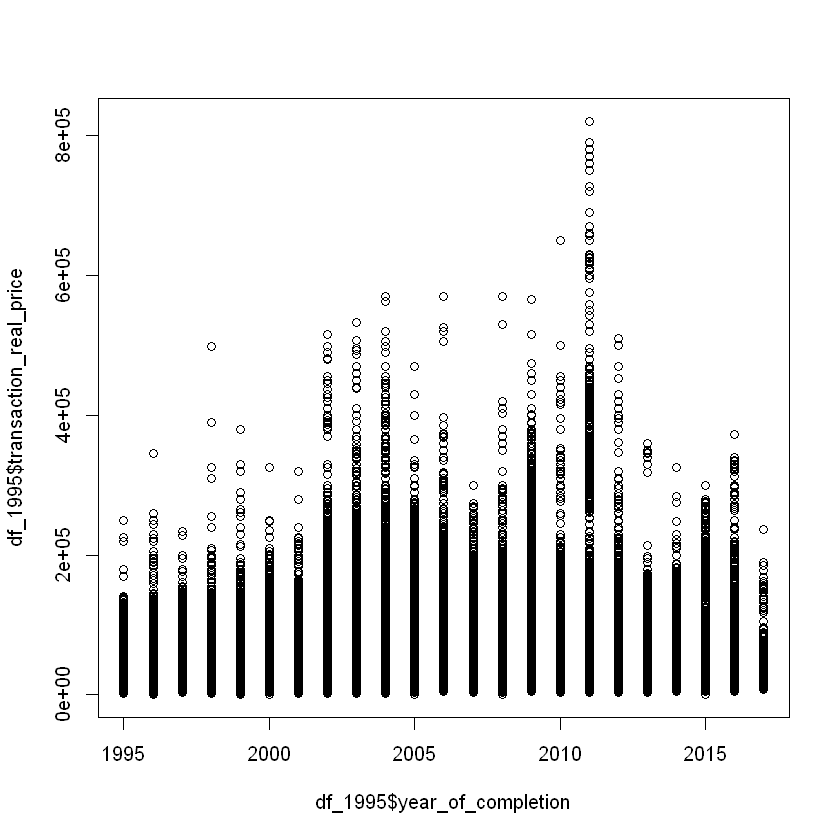

In [14]:
plot(df_1995$year_of_completion,df_1995$transaction_real_price)

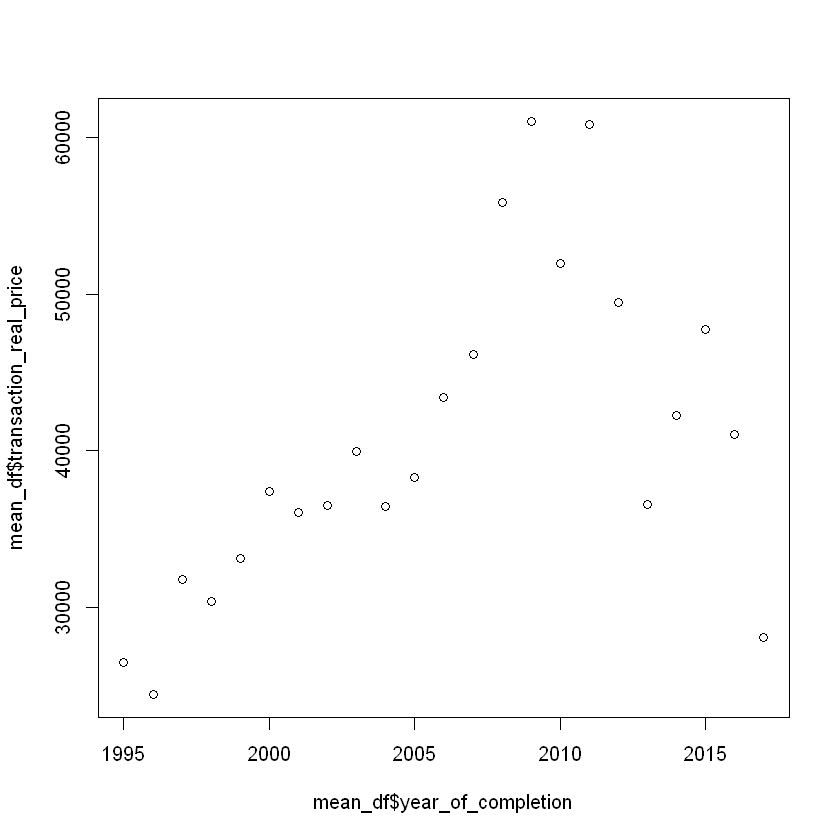

In [15]:
plot(mean_df$year_of_completion,mean_df$transaction_real_price)

[1] 33915.97

[1] 28946.97

영가설 기각

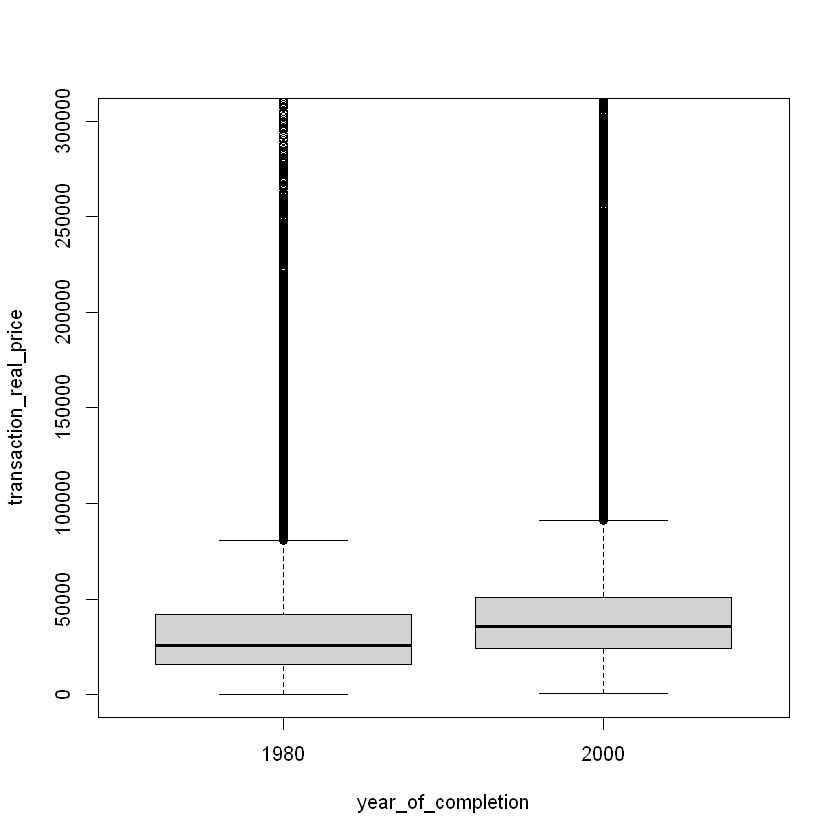

In [29]:
# 2000년 기준 이후 이전으로 가격차이
# 영가설 : 차이 없다
# 대립가설 : 2000년도가 더 비싸다
over_2000 <- train[train$year_of_completion>=2000,]
under_2000 <- train[train$year_of_completion<2000,]

over_2000$year_of_completion = 2000
under_2000$year_of_completion = 1980
year <- rbind(over_2000,under_2000)
boxplot(transaction_real_price~year_of_completion,data=year,ylim=c(0,300000))

mean_under <- mean(under_2000['transaction_real_price'][,1]);mean_under
mean_over <- mean(over_2000['transaction_real_price'][,1])
sd_under <- sd(under_2000['transaction_real_price'][,1]);sd_under
sd_over <- sd(over_2000['transaction_real_price'][,1])


over_price <- c(nrow(over_2000), mean_over, sd_over)
under_price <- c(nrow(under_2000), mean_under, sd_under)


t <- function(x,y,a){
  t0 <- (x[2]-y[2])/sqrt((x[3]^2/x[1])+(y[3]^2/y[1]))
  if(t0>2.33){
    cat('영가설 기각')
  }else{
    cat('영가설 채택')
  }
}
t(over_price,unde,0.123)

# 서울과 부산 어린이집 
- 

In [17]:
head(d)

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,서울특별시,서대문구,가람어린이집,국공립,70,11,5,1,7,N,2018-07-31
2,서울특별시,서대문구,가좌제일어린이집,국공립,88,22,5,2,10,N,2018-07-31
3,서울특별시,서대문구,경찰청어린이집,직장,90,23,6,1,32,N,2018-07-31
4,서울특별시,서대문구,고운햇살어린이집,가정,18,5,3,0,4,N,2018-07-31
5,서울특별시,서대문구,고은어린이집,국공립,93,20,7,2,10,N,2018-07-31
6,서울특별시,서대문구,그루터기어린이집,가정,19,3,3,0,4,N,2018-07-31


In [18]:
# H0 = cctv갯수
city_d <-d[,c(1,5,9)]
str(city_d)
library(stargazer)
stargazer(city_d, type='text')

'data.frame':	7551 obs. of  3 variables:
 $ city             : chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ day_care_baby_num: int  70 88 90 18 93 19 86 20 19 20 ...
 $ CCTV_num         : num  7 10 32 4 10 4 6 5 4 7 ...



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic           N    Mean  St. Dev. Min Max
-----------------------------------------------
day_care_baby_num 7,551 44.397  37.022   5  489
CCTV_num          5,280 6.676   4.482    0  53 
-----------------------------------------------


In [19]:
# 정원수는 도시와 관계가 있을 것이다.

t.test(formula = day_care_baby_num~city, data = city_d)


	Welch Two Sample t-test

data:  day_care_baby_num by city
t = 3.1449, df = 2992.7, p-value = 0.001678
alternative hypothesis: true difference in means between group 부산광역시 and group 서울특별시 is not equal to 0
95 percent confidence interval:
 1.224061 5.277666
sample estimates:
mean in group 부산광역시 mean in group 서울특별시 
                46.83166                 43.58080 


In [20]:
# cctv는 도시와 관계가 있을 것이다.

t.test(formula = CCTV_num~city, data = city_d)


	Welch Two Sample t-test

data:  CCTV_num by city
t = -3.3583, df = 3005.6, p-value = 0.0007939
alternative hypothesis: true difference in means between group 부산광역시 and group 서울특별시 is not equal to 0
95 percent confidence interval:
 -0.6839448 -0.1797063
sample estimates:
mean in group 부산광역시 mean in group 서울특별시 
                6.361672                 6.793498 


In [21]:

stargazer(d,type='text')



Statistic           N    Mean  St. Dev. Min Max
-----------------------------------------------
day_care_baby_num 7,551 44.397  37.022   5  489
teacher_num       7,326 9.014   5.810    0  98 
nursing_room_num  4,352 4.528   2.076    0  22 
playground_num    3,626 0.398   0.731    0  16 
CCTV_num          5,280 6.676   4.482    0  53 
-----------------------------------------------


In [22]:
d1 <- d[d$city == '서울특별시' & d$day_care_type	== '국공립',];d1
d2 <- d[d$city == '서울특별시' & d$day_care_type	== '직장',];d2
d3 <- d[d$city == '서울특별시' & d$day_care_type	== '가정',];d3

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,서울특별시,서대문구,가람어린이집,국공립,70,11,5,1,7,N,2018-07-31
2,서울특별시,서대문구,가좌제일어린이집,국공립,88,22,5,2,10,N,2018-07-31
5,서울특별시,서대문구,고은어린이집,국공립,93,20,7,2,10,N,2018-07-31
7,서울특별시,서대문구,금화어린이집,국공립,86,18,5,2,6,N,2018-07-31
12,서울특별시,서대문구,꿈빛나무어린이집,국공립,66,12,4,1,7,N,2018-07-31
16,서울특별시,서대문구,다솜어린이집,국공립,19,6,3,0,4,N,2018-07-31
20,서울특별시,서대문구,돈의문어린이집,국공립,30,8,6,0,10,N,2018-07-31
21,서울특별시,서대문구,동방어린이집,국공립,76,12,10,1,14,N,2018-07-31
30,서울특별시,서대문구,맑은숲어린이집,국공립,46,12,4,1,8,N,2018-07-31


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,서울특별시,서대문구,경찰청어린이집,직장,90,23,6,1,32,N,2018-07-31
55,서울특별시,서대문구,서대문구청직장어린이집,직장,79,16,6,0,23,N,2018-07-31
65,서울특별시,서대문구,세브란스어린이집,직장,143,30,8,2,28,N,2018-07-31
83,서울특별시,서대문구,연세대학교유진어린이집,직장,164,26,10,2,20,N,2018-07-31
106,서울특별시,서대문구,이화어린이집,직장,48,10,3,0,5,N,2018-07-31
335,서울특별시,도봉구,도봉구청직장어린이집,직장,70,12,6,1,8,N,2018-05-01
387,서울특별시,도봉구,서울북부지방법원어린이집,직장,100,13,7,2,15,N,2018-05-01
411,서울특별시,송파구,AJ어린이집,직장,49,10,NA,NA,6,N,2018-08-03
430,서울특별시,송파구,국민체육진흥공단어린이집,직장,93,16,NA,NA,16,N,2018-08-03


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
4,서울특별시,서대문구,고운햇살어린이집,가정,18,5,3,0,4,N,2018-07-31
6,서울특별시,서대문구,그루터기어린이집,가정,19,3,3,0,4,N,2018-07-31
8,서울특별시,서대문구,꼬꼬마어린이집,가정,20,7,4,0,5,N,2018-07-31
9,서울특별시,서대문구,꼬마박사어린이집,가정,19,6,3,0,4,N,2018-07-31
10,서울특별시,서대문구,꼬마숲어린이집,가정,20,7,4,0,7,N,2018-07-31
11,서울특별시,서대문구,꾸러기어린이집,가정,20,7,3,0,5,N,2018-07-31
14,서울특별시,서대문구,꿈하은어린이집,가정,19,6,3,0,4,N,2018-07-31
15,서울특별시,서대문구,나빛어린이집,가정,20,6,3,0,4,N,2018-07-31
17,서울특별시,서대문구,단비어린이집,가정,19,6,4,0,4,N,2018-07-31


In [23]:
# 국공립
cctv_d <-d1[,c(4,5,9)];head(cctv_d)
str(cctv_d)
stargazer(cctv_d,type='text')
t.test(formula = day_care_baby_num ~ day_care_type, data = cctv_d)

,day_care_type,day_care_baby_num,CCTV_num
,<chr>,<int>,<dbl>
1,국공립,70,7
2,국공립,88,10
5,국공립,93,10
7,국공립,86,6
12,국공립,66,7
16,국공립,19,4


'data.frame':	1231 obs. of  3 variables:
 $ day_care_type    : chr  "국공립" "국공립" "국공립" "국공립" ...
 $ day_care_baby_num: int  70 88 93 86 66 19 30 76 46 82 ...
 $ CCTV_num         : num  7 10 10 6 7 4 10 14 8 13 ...

Statistic           N    Mean  St. Dev. Min Max
-----------------------------------------------
day_care_baby_num 1,231 62.578  38.003   5  280
CCTV_num           858  9.031   4.833    0  39 
-----------------------------------------------


ERROR: Error in t.test.formula(formula = day_care_baby_num ~ day_care_type, data = cctv_d): grouping factor must have exactly 2 levels


In [ ]:
# 직장 어린이집과 가정 어린이집cctv 갯수는 차이가 없다.

# 전체 cctv 평균
mean(cctv_d$CCTV_num,na.rm=T)
sd(cctv_d$CCTV_num,na.rm=T)

# 직장 cctv
x1 = mean(d2$CCTV_num,na.rm=T)
y1 = sd(d2$CCTV_num,na.rm=T)
z1 = nrow(d2)

# 가정 cctv
x2 = mean(d3$CCTV_num,na.rm=T)
y2 = sd(d3$CCTV_num,na.rm=T)
z2 = nrow(d3)

t <- (x1-x2)/sqrt((y1^2/z1)+(y2^2/z2))


[1] 6.676136

[1] 4.482168


Statistic   N   Mean  St. Dev. Min Max
--------------------------------------
CCTV_num  5,280 6.676  4.482    0  53 
--------------------------------------
